In [1]:
import torch
import tqdm
import numpy as np
from sklearn.manifold import TSNE
from torchvision import datasets, models, transforms
from vgg_face import *
from FAUDataset import *
import matplotlib.pyplot as plt

In [18]:
def plot_loss(path):
    with open(path) as f:
        contents = f.readlines()
    train_loss_list = []
    for i in range(len(contents)):
        if 'train_loss' in contents[i]:
            train_loss_list.append(float(contents[i][contents[i].index(':')+1:]))

    test_loss_list = []
    for i in range(len(contents)):
        if 'test_loss' in contents[i]:
            test_loss_list.append(float(contents[i][contents[i].index(':')+1:]))
    plt.plot(test_loss_list, label='test')
    plt.plot(train_loss_list, label='train')
    plt.ylabel('MSE loss')
    plt.title(contents[0]+contents[1]) # General MSE Loss
    plt.ylim([0, 0.05])
    plt.legend()
    plt.show()

def plot_MSE_loss(path):
    with open(path) as f:
        contents = f.readlines()
    train_loss_list = []
    for i in range(len(contents)):
        if 'train_loss' in contents[i]:
            train_loss_list.append(float(contents[i][contents[i].index(':')+1:]))
    train_jaco_loss_list = []
    for i in range(len(contents)):
        if 'jacobian_loss' in contents[i]:
            train_jaco_loss_list.append(float(contents[i][contents[i].index(':')+1:]))

    test_loss_list = []
    for i in range(len(contents)):
        if 'test_loss' in contents[i]:
            test_loss_list.append(float(contents[i][contents[i].index(':')+1:]))
    test_jaco_loss_list = []
    for i in range(len(contents)):
        if 'test_jaco_loss' in contents[i]:
            test_jaco_loss_list.append(float(contents[i][contents[i].index(':')+1:]))

    plt.plot([x - y for x, y in zip(test_loss_list,test_jaco_loss_list)], label='test')
    plt.plot([x - y for x, y in zip(train_loss_list,train_jaco_loss_list)], label='train')
    plt.ylabel('MSE loss')
    plt.title(contents[0]+contents[1]) # General MSE Loss
    plt.ylim([-0.05, 0.05])
    plt.legend()
    plt.show()

def plot_jaco_loss(path):
    with open(path) as f:
        contents = f.readlines()
    train_loss_list = []
    for i in range(len(contents)):
        if 'jacobian_loss' in contents[i]:
            train_loss_list.append(float(contents[i][contents[i].index(':')+1:]))

    test_loss_list = []
    for i in range(len(contents)):
        if 'test_jaco_loss' in contents[i]:
            test_loss_list.append(float(contents[i][contents[i].index(':')+1:]))
    plt.plot(test_loss_list, label='test_jaco')
    plt.plot(train_loss_list, label='train_jaco')
    plt.ylabel('MSE loss')
    plt.title(contents[0]+contents[1]) # General MSE Loss
    plt.ylim([0, 0.05])
    plt.legend()
    plt.show()

def plot_loss_au(path, epoch, target, ylim=None):
    aus = ['pspi', 'au4', 'au6', 'au7', 'au9', 'au10', 'au12', 'au20', 'au25', 'au26', 'au43']
    with open(path) as f:
        contents = f.readlines()
    for i in range(len(contents)):
        if ('train' in contents[i]) and ((target+' at') in contents[i]) and (('epoch'+str(epoch)) in contents[i]):
            train_loss = eval(contents[i][contents[i].index(':')+1:])
    for i in range(len(contents)):
        if ('test' in contents[i]) and ((target+' at') in contents[i]) and (('epoch'+str(epoch)) in contents[i]):
            test_loss = eval(contents[i][contents[i].index(':')+1:])
    plt.bar(aus, test_loss, label='test', alpha=0.5)
    plt.bar(aus, train_loss, label='train', alpha=0.5)
    plt.ylabel(target)
    plt.title(contents[0]+contents[1]) # General MSE Loss
    if any(num < 0 for num in test_loss) or any(num < 0 for num in train_loss):
        plt.ylim([-.5, .5])
    else:
        plt.ylim([0, 2.])
    if ylim != None:
        plt.ylim(ylim)
    plt.legend()
    plt.show()

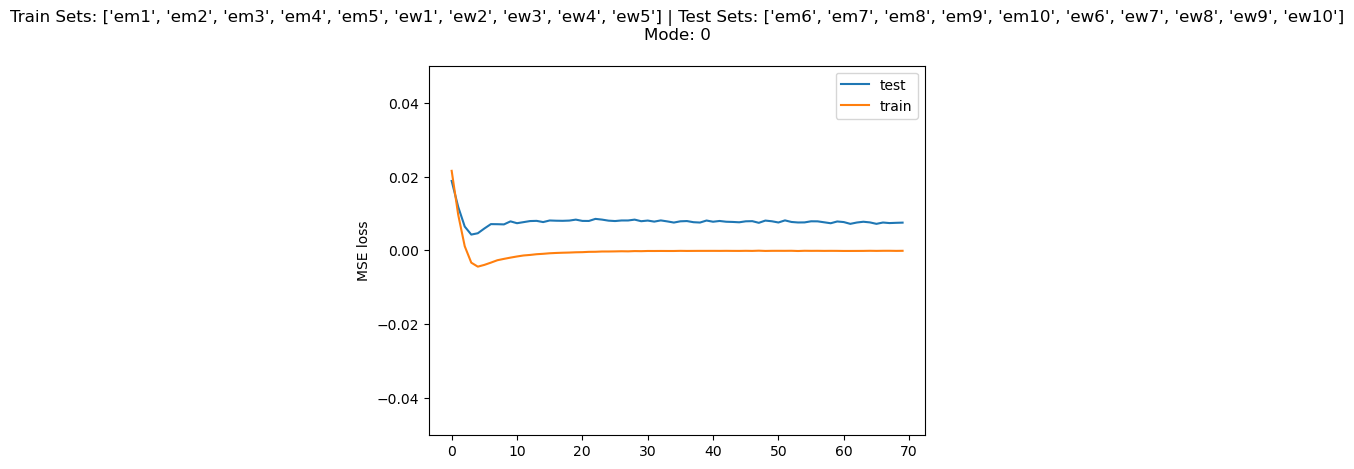

In [21]:

plot_MSE_loss('/Volumes/Yuan-T7/GitHub/FAU_Dataset/code/results_r31/results.txt')

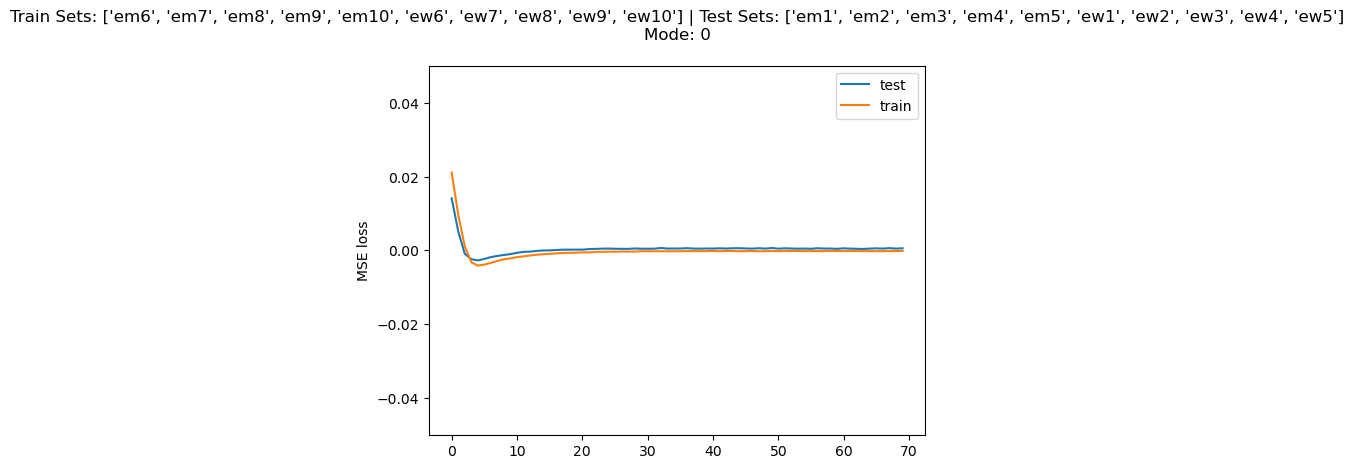

In [20]:
plot_MSE_loss('/Volumes/Yuan-T7/GitHub/FAU_Dataset/code/results_r33/results.txt')

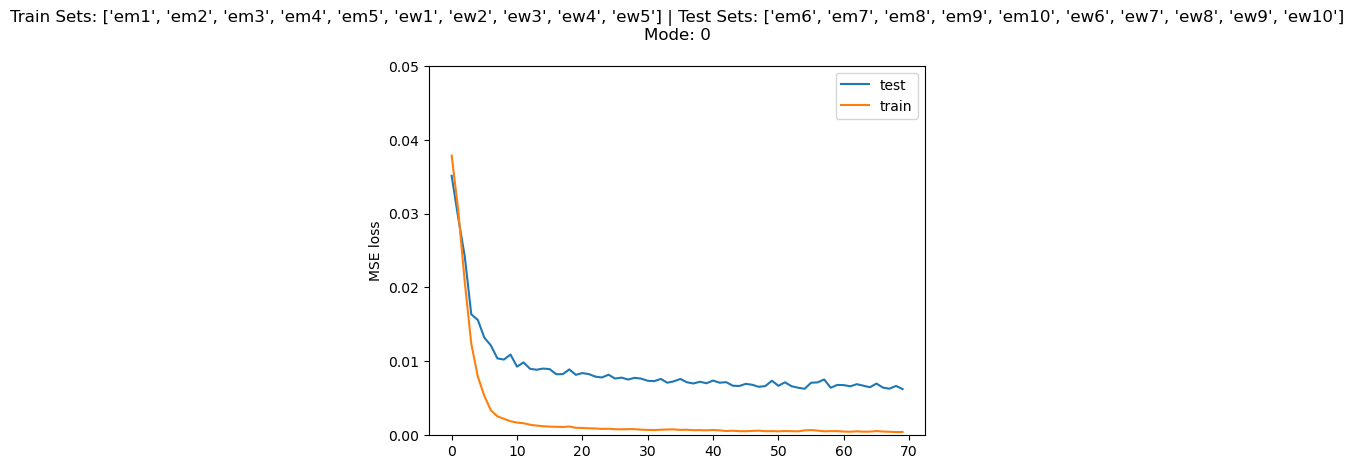

In [4]:
plot_loss('D:/GitHub/FAU_Dataset/code/results_r30/results.txt')

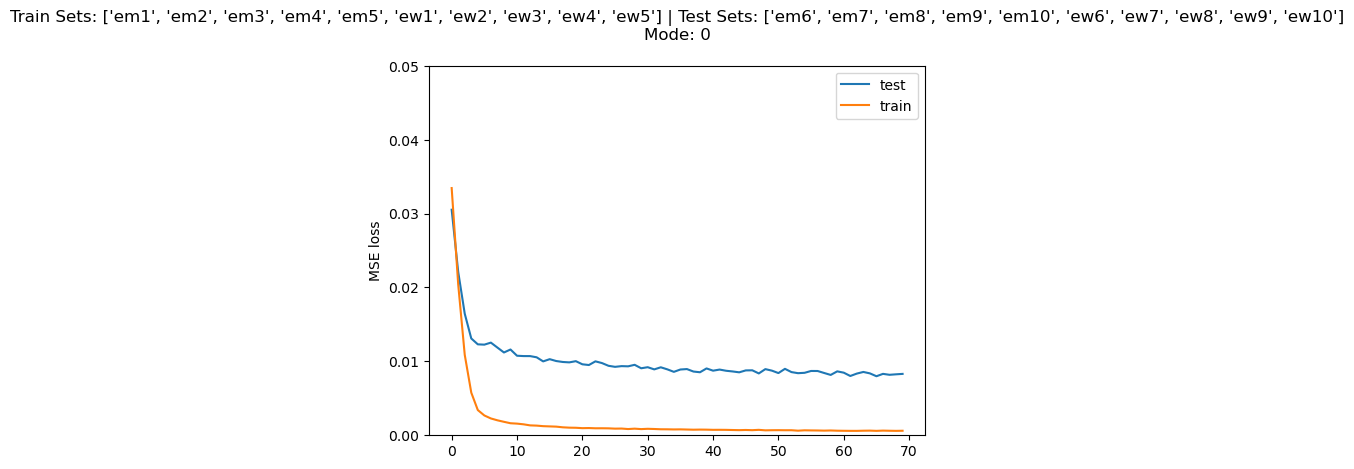

In [8]:
plot_loss('D:/GitHub/FAU_Dataset/code/results_r31/results.txt')

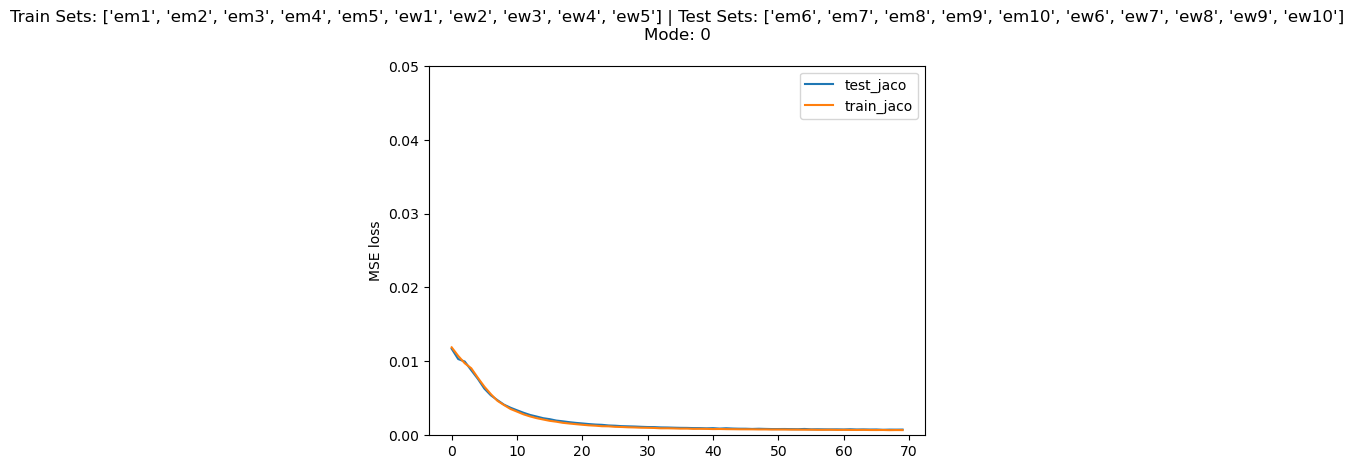

In [12]:
plot_jaco_loss('D:/GitHub/FAU_Dataset/code/results_r31/results.txt')

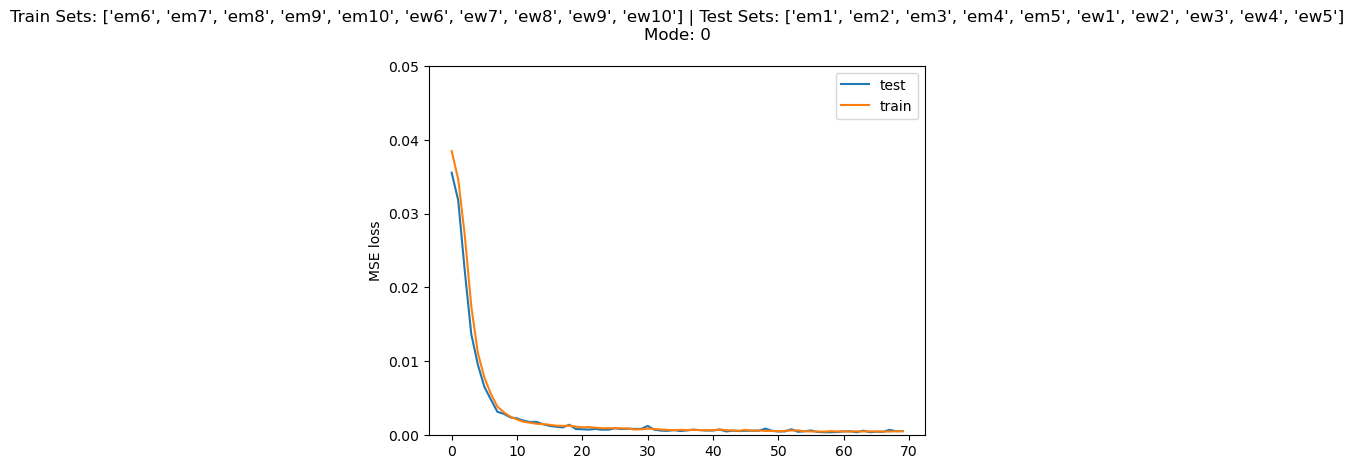

In [4]:
plot_loss('D:/GitHub/FAU_Dataset/code/results_r32/results.txt')

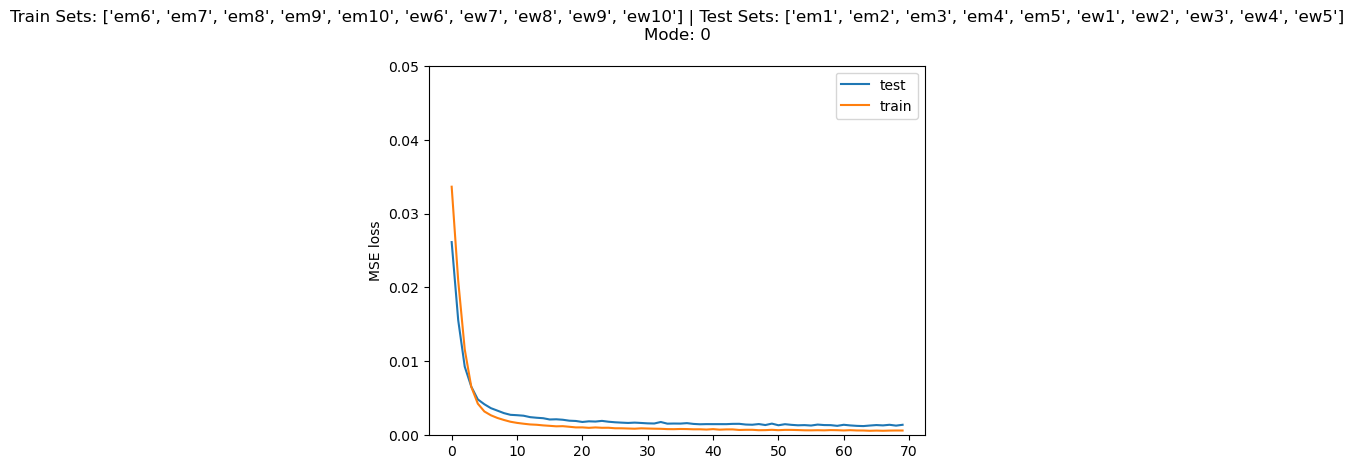

In [5]:
plot_loss('D:/GitHub/FAU_Dataset/code/results_r33/results.txt')

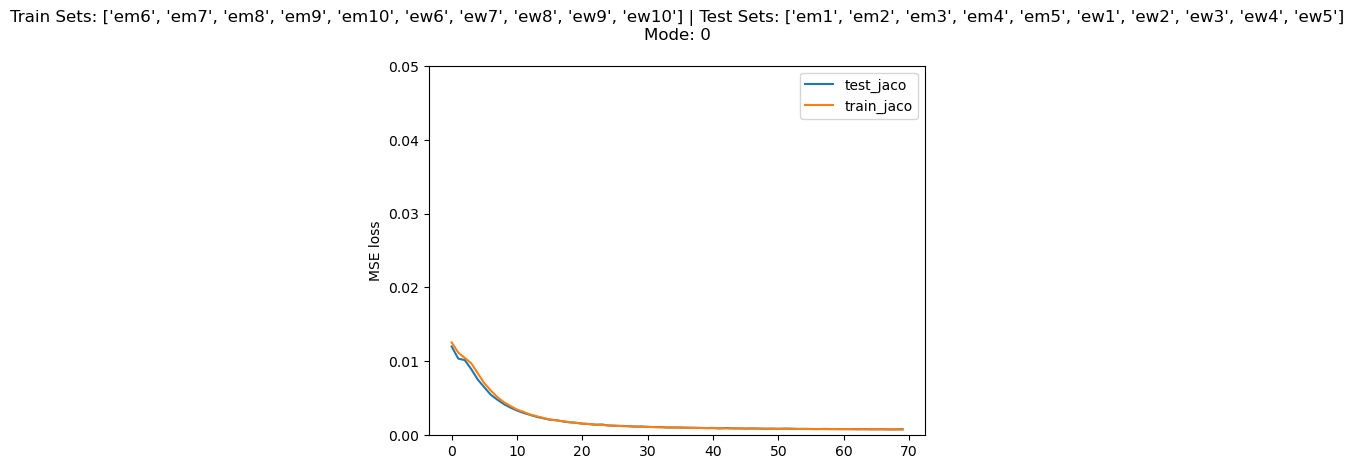

In [7]:
plot_jaco_loss('D:/GitHub/FAU_Dataset/code/results_r33/results.txt')

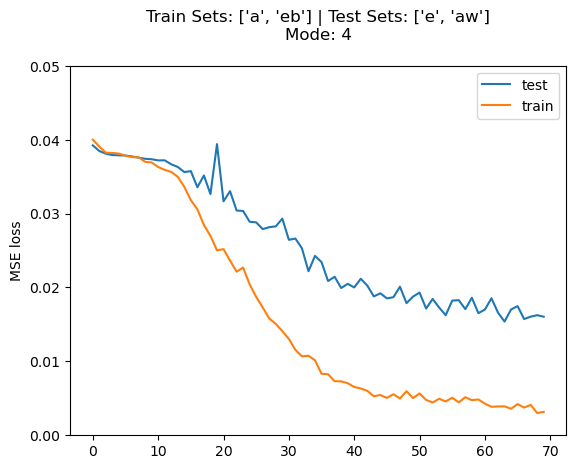

In [51]:
plot_loss('/Volumes/Yuan-T7/GitHub/FAU_Dataset/code/results_r2/results.txt')

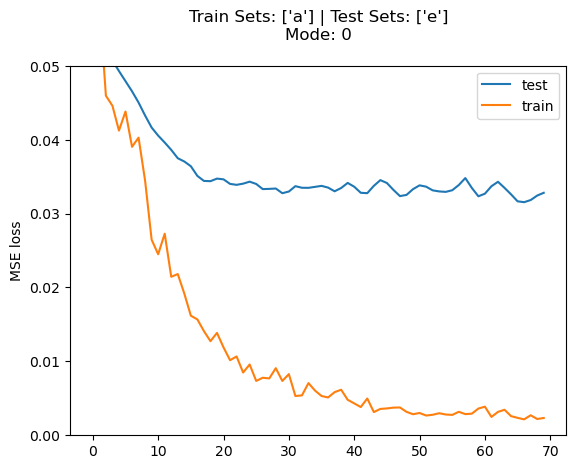

In [52]:
plot_loss('/Volumes/Yuan-T7/GitHub/FAU_Dataset/code/results_r3/results.txt')

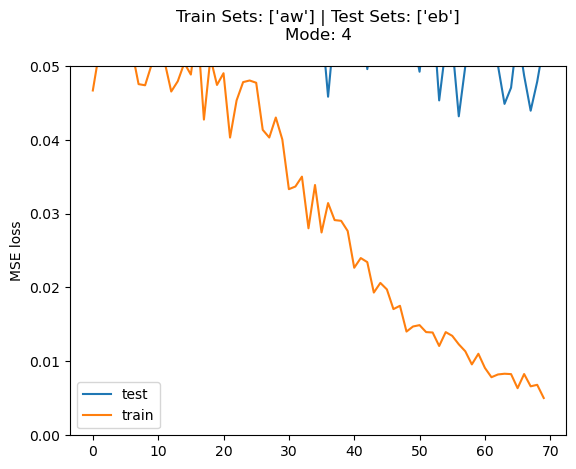

In [63]:
plot_loss('/Volumes/Yuan-T7/GitHub/FAU_Dataset/code/results_r8/results.txt')

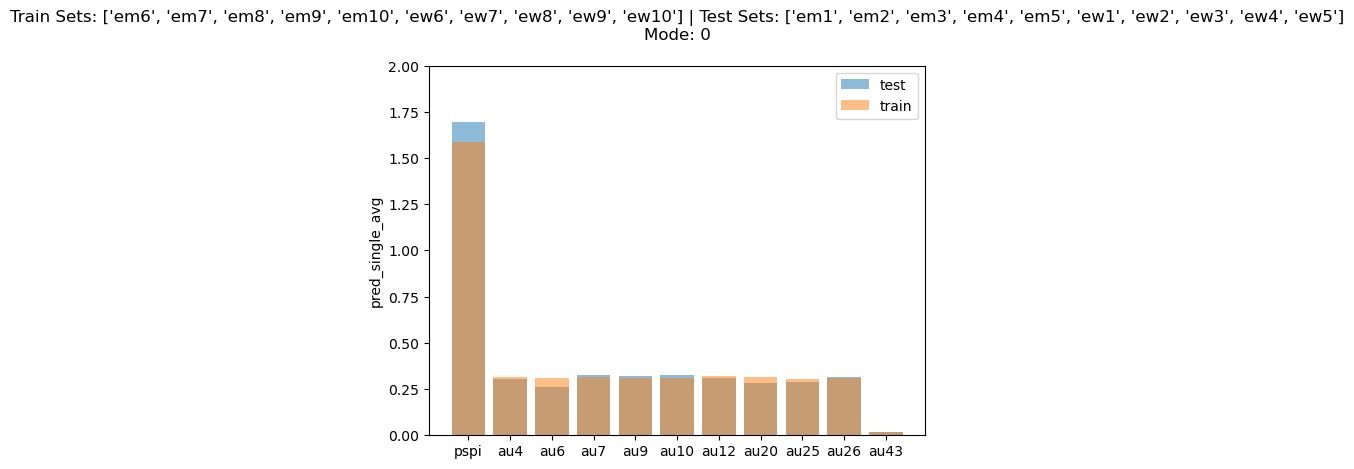

In [14]:
plot_loss_au('D:/GitHub/FAU_Dataset/code/results_r33/results.txt', 69, 'pred_single_avg')

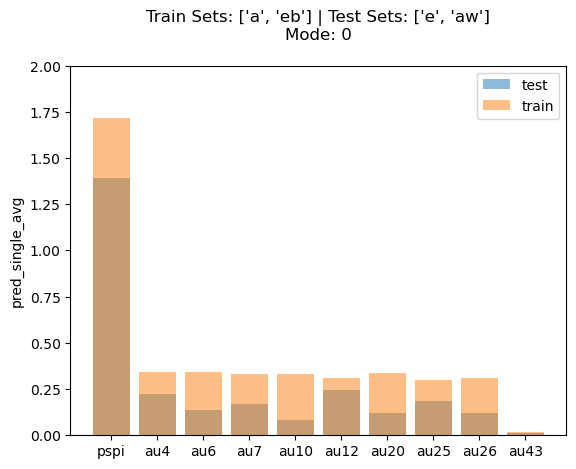

In [49]:
plot_loss_au('/Volumes/Yuan-T7/GitHub/FAU_Dataset/code/results_r1/results.txt', 69, 'pred_single_avg')

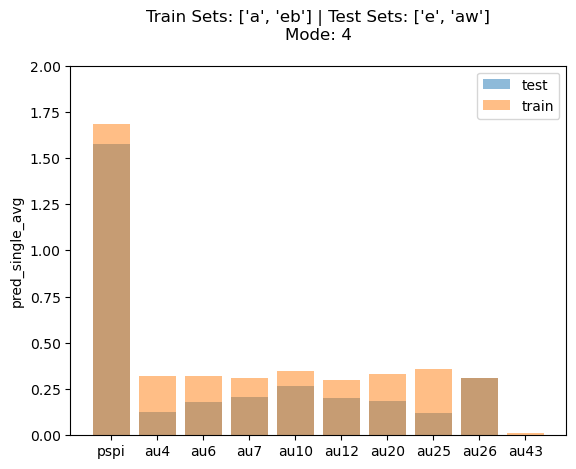

In [50]:
plot_loss_au('/Volumes/Yuan-T7/GitHub/FAU_Dataset/code/results_r2/results.txt', 69, 'pred_single_avg')

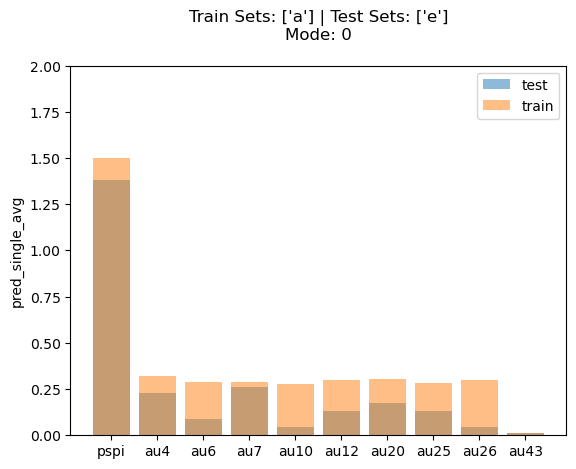

In [54]:
plot_loss_au('/Volumes/Yuan-T7/GitHub/FAU_Dataset/code/results_r3/results.txt', 69, 'pred_single_avg')

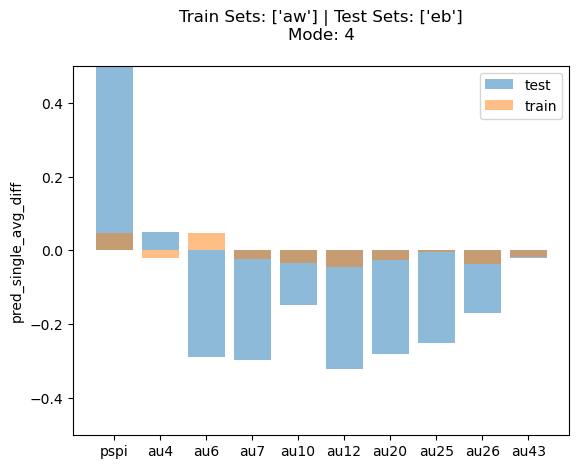

In [77]:
plot_loss_au('/Volumes/Yuan-T7/GitHub/FAU_Dataset/code/results_r8/results.txt', 69, 'pred_single_avg_diff')